In [74]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

In [6]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data('MNIST')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train[0].shape

(28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

5

In [15]:
x_train=x_train/255
x_test=x_test/255

In [84]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [85]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [87]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8802 - val_loss: 0.1698 - val_accuracy: 0.9521
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9365 - val_loss: 0.1269 - val_accuracy: 0.9629
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1668 - accuracy: 0.9500 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9565 - val_loss: 0.1008 - val_accuracy: 0.9688
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9593 - val_loss: 0.0951 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1193 - accuracy: 0.9621 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1114 - accuracy: 0.9649 - val_loss: 0.0835 - val_accuracy:

In [88]:
y_prob=model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [89]:
y_pred=y_prob.argmax(axis=1)

In [90]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

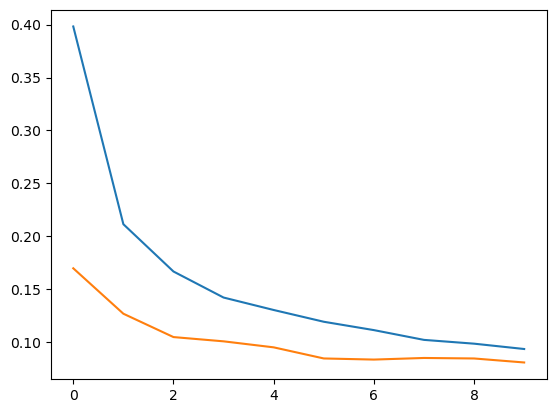

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

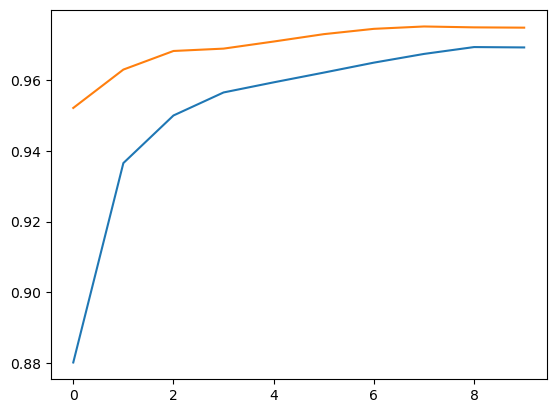

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [93]:
model.save('mnist_model.h5')